In this individual assignment we will take a look at sentiment analysis task with Naive Bayes classifier.

---

Assignment consists of 3 parts:


*   Data exploration
*   Sentiment classification
*   Report


You can use the following references as a guide for your homework:

* https://www.enjoyalgorithms.com/blog/sentiment-analysis-using-naive-bayes
* https://www.enjoyalgorithms.com/blog/text-data-pre-processing-techniques-in-ml
* https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes
* For precision, recall, f1 refer to https://scikit-learn.org/stable/modules/classes.html?highlight=metrics#module-sklearn.metrics

To access dataset:

Option 1: upload data to your Google Drive, then mount the drive

Option 2: upload directly to colab


In [ ]:
# To mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


First let's import all neccessary for this assignment modules.

In [ ]:
!pip install scattertext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt_n
import matplotlib.pyplot as plt_p
import matplotlib.pyplot as plt_neg
import nltk
import pandas as pd
import scattertext as st
import spacy
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import WhitespaceTokenizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn import metrics

Now, pick a dataset for the analysis from the following:


*   Financial dataset (https://www.kaggle.com/datasets/sbhatti/financial-sentiment-analysis)
*   Movie review (https://www.kaggle.com/code/lakshmi25npathi/sentiment-analysis-of-imdb-movie-reviews/data)
* Amazon Kindle Book Review (https://www.kaggle.com/datasets/meetnagadia/amazon-kindle-book-review-for-sentiment-analysis) - use 'preprocessed_kindle_review.csv and convert rating into sentiment: 1-2: negative, 3: neutral, 4-5: positive
* Steam Reviews (https://www.kaggle.com/datasets/piyushagni5/sentiment-analysis-for-steam-reviews) use train.csv and treat 'user_suggestion' as a Sentiment 1-positive, 0-negative

Download it from kaggle.com and upload to this colab: left menu 'Files'-> 'Upload file'

**Make sure that your file is fully uploaded before proceeding**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Exploration

In [ ]:
# Use pd.read_csv to upload dataset [~ 1 line].
# You can use 'usecols' argument to specify which columns to load


# Your code here:
dataset=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATA/data.csv")


In [ ]:
# You can take a look at first 5 entries with the following
dataset.head(5)

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [ ]:
# If you don't have an explicit 'sentiment' column, 
# identify which can be used as a proxy and create a 'sentiment' column based on
# the proxy column. 


# Your code here:
# Hint: use '.map' method


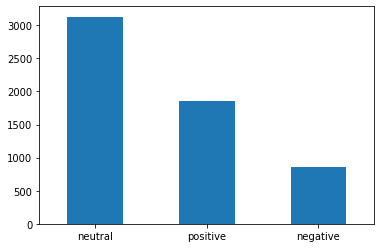

In [ ]:
# Now let's take a look at the distribution of labels (i.e. sentiment values)
# across the dataset.

# Display a bar plot based on value counts of the 'sentiment' column [~ 1 line] 

# Your code here:
dataset['Sentiment'].value_counts().plot(kind='bar',rot=0)


**Answer this question in your report:**

What problem we see with the dataset, if any?

If there is a problem, how it can impact classification?

In [ ]:
# Let's create a separate numerical column 'label', 
# which will be used by our classifier.

# Create a new column 'label' based on values in the 'sentiment' column.
# It is up to you what number to assign to each category. [~ 1 line]
# For example, if there are 3 categories ("positive", "negative", "neutral"),
# I would use something like:
# 
# >>> df[<your sentiment column>].map({"positive":2, "negative":1, "neutral":0})


# Your code here:
dataset['label']= dataset['Sentiment'].map({"positive":2, "negative":1, "neutral":0})
dataset.head(8)

,Sentence,Sentiment,label
0,The GeoSolutions technology will leverage Bene...,positive,2
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,1
2,"For the last quarter of 2010 , Componenta 's n...",positive,2
3,According to the Finnish-Russian Chamber of Co...,neutral,0
4,The Swedish buyout firm has sold its remaining...,neutral,0
5,$SPY wouldn't be surprised to see a green close,positive,2
6,Shell's $70 Billion BG Deal Meets Shareholder ...,negative,1
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative,1


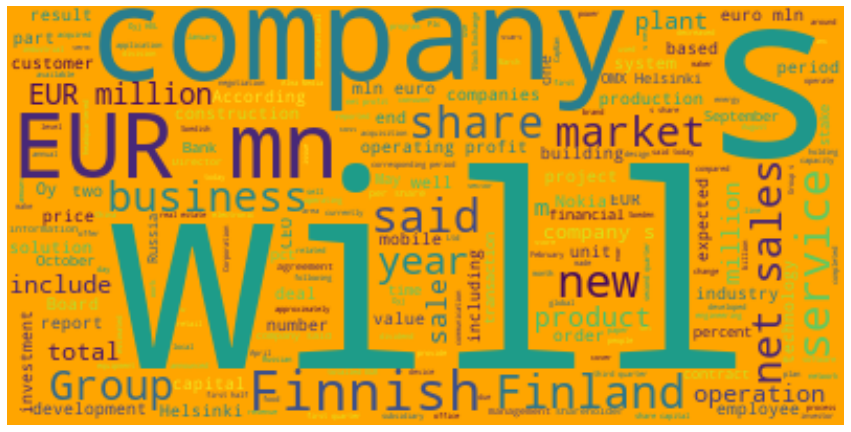

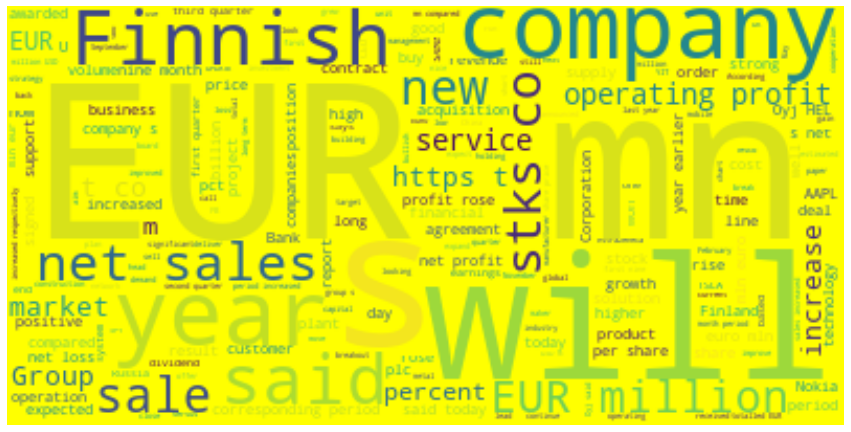

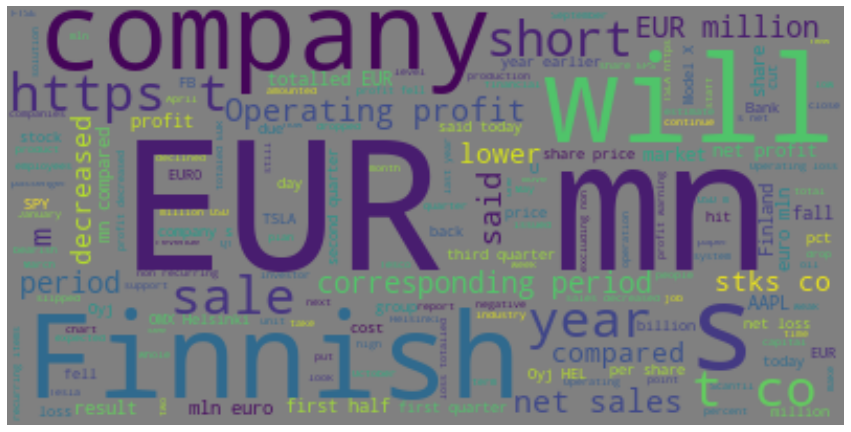

In [ ]:
from numpy import negative
# To further get a notion of our dataset, let's display 
# a word cloud for each sentiment category, present in your dataset. [~ 7 lines per category]

# You are free to use the following code as a general guide.

# First let's extract only positive sentences
# >>> positive = dataset[dataset[<sentiment column>] == "positive"]
# Now let's write all positive entries into one variable
# >>> text = "".join([i for i in positive[<sentence column>]])
# The following creates a WordCloud instance
# >>> wordcloud = WordCloud(background_color="grey").generate(text)
# Finally, let's display our word cloud
# >>> plt.figure(figsize=(15,10))
# >>> plt.imshow(wordcloud, interpolation='bilinear')
# >>> plt.axis("off")
# >>> plt.show()
import wordcloud
# Your code here:
neutral = dataset[dataset['Sentiment'] == "neutral"]
positive = dataset[dataset['Sentiment'] == "positive"]
negative = dataset[dataset['Sentiment'] == "negative"]
text_n = "".join([i for i in neutral['Sentence']]) 
text_p = "".join([i for i in positive['Sentence']]) 
text_neg = "".join([i for i in negative['Sentence']]) 
wordcloud_n = WordCloud(background_color="orange").generate(text_n)
wordcloud_p = WordCloud(background_color="yellow").generate(text_p)
wordcloud_neg = WordCloud(background_color="grey").generate(text_neg)
plt_n.figure(figsize=(15,10))
plt_n.imshow(wordcloud_n, interpolation='bilinear')
plt_n.axis("off")
plt_n.show()
plt_p.figure(figsize=(15,10))
plt_p.imshow(wordcloud_p, interpolation='bilinear')
plt_p.axis("off")
plt_p.show()
plt_neg.figure(figsize=(15,10))
plt_neg.imshow(wordcloud_neg, interpolation='bilinear')
plt_neg.axis("off")
plt_neg.show()

In [ ]:
# For a more interactive exploration of your dataset, 
# we will use 'scattertext' library, imported as st
import scattertext as st
# Adjust the following code to work with your dataset
# Leave this line as is
nlp = spacy.load('en_core_web_sm')

# Now let's remove stopwords
nltk.download('stopwords')
st_wd = stopwords.words('english')

# Let's exclude neutral sentences, if there are any
# Use the following example as a reference:
# >>> 

# The following code puts your sentences into lower case and removes stopwords
# Change '<Your Sentences Column>' to the name of the column with sentences.

ds = dataset[dataset["Sentiment"] != "neutral"].copy()
ds['Sentence'] = ds['Sentence'].apply(
    lambda words: ' '.join(
        str(word).lower() for word in words.split() 
        if str(word).lower() not in st_wd)
    )


ds.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Sentence,Sentiment,label
0,geosolutions technology leverage benefon 's gp...,positive,2
1,"$esi lows, $1.50 $2.50 bk real possibility",negative,1
2,"last quarter 2010 , componenta 's net sales do...",positive,2
5,$spy surprised see green close,positive,2
6,shell's $70 billion bg deal meets shareholder ...,negative,1


In [ ]:
# Let's create a corpus for the following plot.
# It is possible, that this will take a long time, 
# when the whole ds is provided. In this case, pick a slice of your dataset,
# i.e. ds[:1000], or ds[2000:3500], etc.
corpus = st.CorpusFromPandas(ds,
                             category_col= 'Sentiment' , # provide the name of your sentiment column here
                             text_col= 'Sentence' , # provide the name of your sentences' column here
                             nlp=nlp
                             ).build()

In [ ]:
# The following code will create an interactive plot and save it as 'my_plot.html'.
# Download it to your machine and open in a separate tab to explore.
# Include a screenshot in your report. 
html = st.produce_scattertext_explorer(
    corpus,
    category="negative",
    not_category_name="positive",
    transform=st.Scalers.log_scale_standardize
)
open('/content/drive/MyDrive/Colab Notebooks/DATA/my_plot.html', 'wb').write(html.encode('utf-8'))

/usr/local/lib/python3.7/dist-packages/scattertext/ScatterChart.py:441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  .apply(np.round).astype(int))
/usr/local/lib/python3.7/dist-packages/scattertext/ScatterChart.py:444: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  .apply(np.round).astype(int))
/usr/local/lib/python3.7/dist-packages/scattertext/ScatterChart.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

889285

# Sentiment classification

In [ ]:
# Let's preprocess dataset first
# First, put your sentences in a lowercase [~ 1 line]
# Suggestion: create a separate variable (e.g. corpus)
# to store sentences from the dataset

# Your code here
corpus=dataset['Sentence'].str.lower()
corpus.head(5)


0    the geosolutions technology will leverage bene...
1    $esi on lows, down $1.50 to $2.50 bk a real po...
2    for the last quarter of 2010 , componenta 's n...
3    according to the finnish-russian chamber of co...
4    the swedish buyout firm has sold its remaining...
Name: Sentence, dtype: object

In [ ]:
# Now, let's replace hyperlinks, if any exist [~ 1line]
# Hint: regex for hyperlinks is r"http\S+"

# Your code here
corpus=corpus.str.replace("http\S+"," ",regex=True)
corpus.head(15)


0     the geosolutions technology will leverage bene...
1     $esi on lows, down $1.50 to $2.50 bk a real po...
2     for the last quarter of 2010 , componenta 's n...
3     according to the finnish-russian chamber of co...
4     the swedish buyout firm has sold its remaining...
5       $spy wouldn't be surprised to see a green close
6     shell's $70 billion bg deal meets shareholder ...
7     ssh communications security corp stock exchang...
8     kone 's net sales rose by some 14 % year-on-ye...
9     the stockmann department store will have a tot...
10    circulation revenue has increased by 5 % in fi...
11    $sap q1 disappoints as #software licenses down...
12    the subdivision made sales revenues last year ...
13             viking line has canceled some services .
14    ahlstrom corporation stock exchange announceme...
Name: Sentence, dtype: object

In [ ]:
# Finally, let's remove punctuations
# Hint: regex for punctuations r"[^A-Za-z0-9]+"

# Your code here
corpus=corpus.str.replace("[^A-Za-z0-9]+"," ",regex=True)
corpus.head(15)


0     the geosolutions technology will leverage bene...
1      esi on lows down 1 50 to 2 50 bk a real possi...
2     for the last quarter of 2010 componenta s net ...
3     according to the finnish russian chamber of co...
4     the swedish buyout firm has sold its remaining...
5        spy wouldn t be surprised to see a green close
6     shell s 70 billion bg deal meets shareholder s...
7     ssh communications security corp stock exchang...
8     kone s net sales rose by some 14 year on year ...
9     the stockmann department store will have a tot...
10    circulation revenue has increased by 5 in finl...
11     sap q1 disappoints as software licenses down ...
12    the subdivision made sales revenues last year ...
13              viking line has canceled some services 
14    ahlstrom corporation stock exchange announceme...
Name: Sentence, dtype: object

In [ ]:
# Now let's remove stopwords
nltk.download('stopwords')
stpwrds = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Remove stopwords from the text [~ 1 line]

# Your code here:
import nltk
from nltk.corpus import stopwords
stpwrds=stopwords.words('english')
corpus = corpus.apply( lambda words: ' '.join(word for word in words.split() if word not in stpwrds))
corpus.head(15)



0     geosolutions technology leverage benefon gps s...
1                esi lows 1 50 2 50 bk real possibility
2     last quarter 2010 componenta net sales doubled...
3     according finnish russian chamber commerce maj...
4     swedish buyout firm sold remaining 22 4 percen...
5                         spy surprised see green close
6     shell 70 billion bg deal meets shareholder ske...
7     ssh communications security corp stock exchang...
8     kone net sales rose 14 year year first nine mo...
9     stockmann department store total floor space 8...
10    circulation revenue increased 5 finland 4 swed...
11    sap q1 disappoints software licenses real prob...
12    subdivision made sales revenues last year eur ...
13                        viking line canceled services
14    ahlstrom corporation stock exchange announceme...
Name: Sentence, dtype: object

In [ ]:
# Lemmatization
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
lemmatizer=WordNetLemmatizer()
tokenizer=WhitespaceTokenizer()


# Create an instance of a WhitespaceTokenizer [1 line],
# and WordNetLemmatizer [1 line]

# Perform lemmatization on your sentences,
# for example, if my sentence array is stored 
# in a corpus variable, I would use the following code:
# >>> corpus = corpus.apply(
# >>>    lambda words: ' '.join(
# >>>        lemmatizer.lemmatize(word) for word in tokenizer.tokenize(words)
# >>>        )
# >>>    )

# Your code here:
corpus = corpus.apply(
    lambda words: ' '.join(
        lemmatizer.lemmatize(word) for word in tokenizer.tokenize(words)
        )
    )
corpus.head(5)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0    geosolutions technology leverage benefon gps s...
1                esi low 1 50 2 50 bk real possibility
2    last quarter 2010 componenta net sale doubled ...
3    according finnish russian chamber commerce maj...
4    swedish buyout firm sold remaining 22 4 percen...
Name: Sentence, dtype: object

In [ ]:
# Create an instance of a CountVectorizer [1 line]
# and encode your sentences [~ 1 line]
# hint: look into fit_transform

# Your code here:

cv=CountVectorizer(stop_words='english')
pro_ip=cv.fit_transform(corpus)


In [ ]:
# Create a separate variable, which holds a numpy array of labels [1 line]
# Hint: use to_numpy()

# Your code here:
lab=dataset['label'].to_numpy()
dataset.head(5)


,Sentence,Sentiment,label
0,The GeoSolutions technology will leverage Bene...,positive,2
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,1
2,"For the last quarter of 2010 , Componenta 's n...",positive,2
3,According to the Finnish-Russian Chamber of Co...,neutral,0
4,The Swedish buyout firm has sold its remaining...,neutral,0


In [ ]:
from pandas.core.common import random_state
# Create a train and test dataset with 'train_test_split' [1 line]

# Your code here:
x_train,x_test,y_train,y_test=train_test_split(pro_ip,lab,stratify=lab,test_size=0.2,random_state=24)


In [ ]:
# Create an instance of a MultinomialNB model [1 line]
# and fit it with a training data [1 line]

# Your code here:
model_multi=MultinomialNB()
model_multi.fit(x_train,y_train)

MultinomialNB()

In [ ]:
# Evaluate your model on a test dataset [~ 1 line]
# Hint: display the accuracy, achieved on a test data

# Your code here 
model_multi.score(x_test,y_test)


0.6757912745936698

In [ ]:
# Create an instance of a ComplementNB model [1 line]
# and fit it with a training data [1 line] 

# Your code here:
model_comp=ComplementNB()
model_comp.fit(x_train,y_train)

ComplementNB()

In [ ]:
# Evaluate your model on a test dataset [~ 1 line]
# Hint: display the accuracy, achieved on a test data

# Your code here 
model_comp.score(x_test,y_test)


0.6526946107784432

In [ ]:
# For both models calculate precision, recall and F1 scores [~ 8 lines]

# Your code here:
pred_multi=model_multi.predict(x_test)
pred_comp=model_comp.predict(x_test)


In [ ]:
precis_multi=metrics.precision_score(pred_multi,y_test,average=None)
recal_multi=metrics.recall_score(pred_multi,y_test,average=None)
f1_multi=metrics.f1_score(pred_multi,y_test,average=None)
print("MultinomialNB Precision={},recall={},f1={}".format(precis_multi,recal_multi,f1_multi))
precis_comp=metrics.precision_score(pred_comp,y_test,average=None)
recal_comp=metrics.recall_score(pred_comp,y_test,average=None)
f1_comp=metrics.f1_score(pred_comp,y_test,average=None)
print("ComplementNB Precision={},recall={},f1={}".format(precis_comp,recal_comp,f1_comp))

MultinomialNB Precision=[0.75239617 0.41860465 0.66576819],recall=[0.7370892  0.42105263 0.68802228],f1=[0.74466403 0.41982507 0.67671233]
ComplementNB Precision=[0.68051118 0.52325581 0.66576819],recall=[0.75666075 0.37190083 0.67857143],f1=[0.71656854 0.43478261 0.67210884]


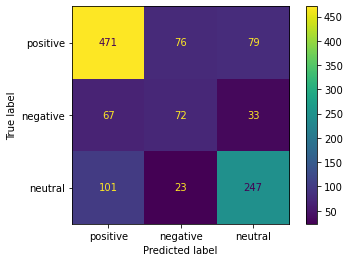

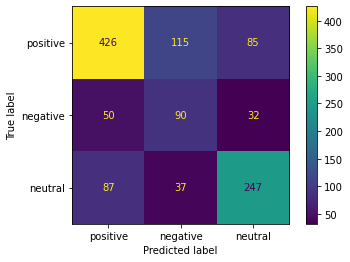

In [ ]:
# For both models display confusion matrix [~ 6 lines]
# Hint: metrics.confusion_matrix can be used to calculate the matrix
# and metrics.ConfusionMatrixDisplay can be used for plotting

# Your code here
cm_multi =metrics.confusion_matrix(y_test,pred_multi,labels=model_multi.classes_)
cm_comp =metrics.confusion_matrix(y_test,pred_comp,labels=model_comp.classes_)
disp_multi=metrics.ConfusionMatrixDisplay(confusion_matrix=cm_multi,display_labels=['positive','negative','neutral'])
disp_comp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm_comp,display_labels=['positive','negative','neutral'])
disp_multi.plot()
disp_comp.plot()

# Report

In [ ]:
# Finally, compose a report, which will include your thoughts on the data you've explored:
# Include all plots, you've generated accompanied with your analysis.
# Include analysis of 2 classifiers you've used in this analysis. Which of them was better and why?
# Again, include calculated scores and plots, accompanied with your analysis.